In [ ]:
'''

[1.3] 统计分析

统计指标对定量数据进行统计描述，常从集中趋势和离中趋势两个方面进行分析

集中趋势度量/离中趋势度量

'''

In [1]:
# 导包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial Unicode MS'
%matplotlib inline

In [9]:
# 1.集中趋势的度量
# 指一组数据向某一中心点靠拢的倾向，核心在于寻找数据的核心值和代表值 —— 统计平均数
# 算数平均数、位置平均数

# (1)算数平均数
# 创建数据
data = pd.DataFrame({'f': np.random.rand(100), 'value':np.random.randint(100, 120, 100)})
data['f'] = data['f'] / data['f'].sum()  # f为权重
print(data.head())
print('-' * 88)

# 计算数据的简单平均数
mean = data['value'].mean()
print("简单算数平均数为:%.2f" % mean)
# 简单平均数 = 总和 / 样本数量     (不涉及权重)

# 计算加权算数平均数
mean_w = (data['f'] * data['value']).sum() / data['f'].sum()
print("加权算数平均数为:%.2f" % mean_w)
# 加权算数平均数 = (x1f1 + x2f2 + x3f3 + ... + xnfn) / (f1 + f2 + f3 + ... + fn)

          f  value
0  0.010154    100
1  0.018335    108
2  0.011599    110
3  0.010132    102
4  0.003351    103
----------------------------------------------------------------------------------------
简单算数平均数为:109.56
加权算数平均数为:109.35


众数为: [113]
中位数为: 109.5


Text(114.56, 0.01, '中位数为:109.5')

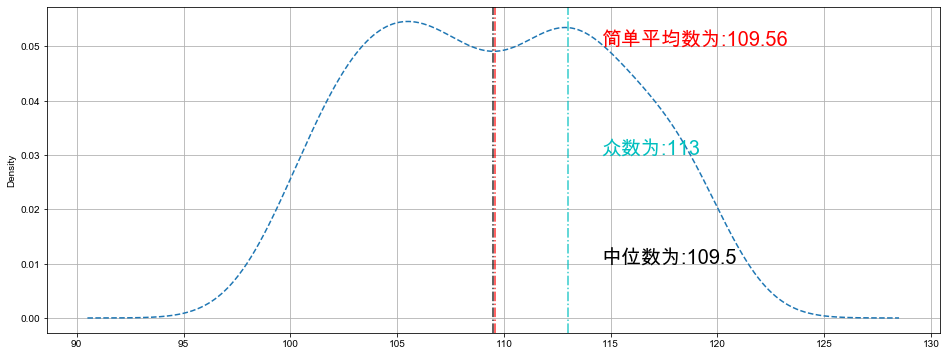

In [26]:
# 1.集中趋势
# (2)位置平均数
m = data['value'].mode().tolist()
print("众数为:", m)
# 众数是一组数据中出现次数最多的数，这里可能返回多个值

med = data['value'].median()
print("中位数为:", med)
# 中位数指将总体的值按照从小到大的顺序排列后，取中间位置的数字

# 密度曲线
data['value'].plot(kind='kde', style='--', grid=True, figsize=(16, 6))

plt.axvline(mean, color='r', linestyle='-.', alpha=0.8)  # 平均数的线
plt.text(mean+5, 0.05, "简单平均数为:%s" % mean, color='r', fontsize=20)  # 平均数标记

plt.axvline(m, color='c', alpha=0.8, linestyle='-.')  # 众数的线
plt.text(mean+5, 0.03, '众数为:%s' % m[0], color='c', fontsize=20)  # 众数的标记

plt.axvline(med, linestyle='-.', color='k', alpha=0.8)  # 中位数的线
plt.text(mean+5, 0.01, "中位数为:%s" % med, color='k', fontsize=20)  # 中位数的标记


In [35]:
# 2.离中趋势分析度量
# 指一组数据中格数据以不同程度的距离偏离中心的趋势
# 极差、分位差、方差、标准差、离散系数
# 创建数据
data = pd.DataFrame({'A_sale':np.random.rand(30)*1000,
                    'B_sale':np.random.rand(30)*1000}, index=pd.period_range("20190601", "20190630"))
print(data.head())
print('-' * 88)

                A_sale      B_sale
2019-06-01  935.350384  860.300829
2019-06-02  693.426312  212.383447
2019-06-03  679.156548  557.297567
2019-06-04  123.141319  219.801908
2019-06-05  655.951503   42.231824
----------------------------------------------------------------------------------------


a的极差为: 972.2488066719584
b的极差为: 979.5206176455534
----------------------------------------------------------------------------------------
a的分位差为: 401.7936810225447
b的分位差为: 581.1978388114044
----------------------------------------------------------------------------------------


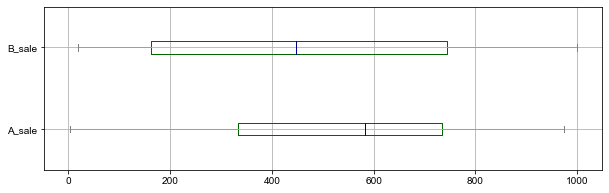

In [36]:
# 2.离中趋势分析
# 极差、分位差
# 计算数据的极差, 极差不会考虑中间变量的变动，测定离中趋势不稳定
a_jc = data['A_sale'].max() - data['A_sale'].min()  # A销量的极差
b_jc = data['B_sale'].max() - data['B_sale'].min()  # B销量的极差
print('a的极差为:', a_jc)
print('b的极差为:', b_jc)
print('-' * 88)
# 计算数据的分位差
a_fwc = data['A_sale'].quantile(q=0.75) - data['A_sale'].quantile(q=0.25)
b_fwc = data['B_sale'].quantile(q=0.75) - data['B_sale'].quantile(q=0.25)
print('a的分位差为:', a_fwc)
print('b的分位差为:', b_fwc)
print('-' * 88)

# 绘制箱型图
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data.plot.box(vert=False, grid=True, color=color, figsize=(10, 3))

A销量的方差:
 85519.4968861447
B销量的方差:
 98457.61615776835
----------------------------------------------------------------------------------------
A销量的标准差:
 292.43716741574536
B销量的标准差:
 313.77956618901806
----------------------------------------------------------------------------------------


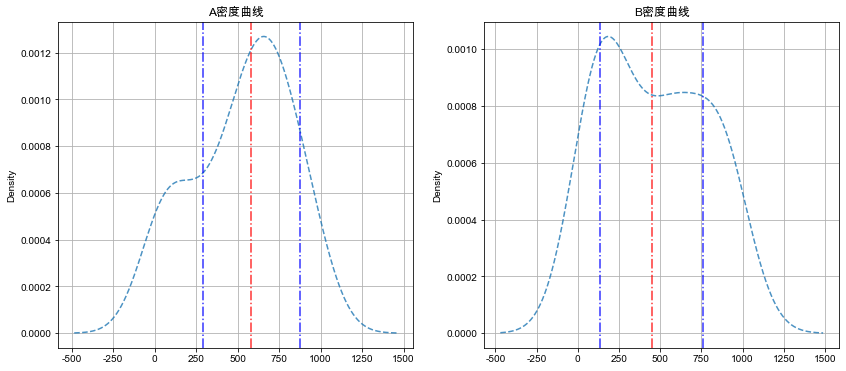

In [58]:
# 离中趋势的度量
# (2)方差、标准差
# 计算方差
a_var = data['A_sale'].var()  # A销量的方差
b_var = data['B_sale'].var()  # B销量的方差
print('A销量的方差:\n', a_var)
print('B销量的方差:\n', b_var)
print('-' * 88)

# 计算标准差
a_std = data['A_sale'].std()  # A销量的标准差
b_std = data['B_sale'].std()  # B销量的标准差
print('A销量的标准差:\n', a_std)
print('B销量的标准差:\n', b_std)
print('-' * 88)
# 标准差是最常用的离中趋势指标:标准差越大，离中趋势越明显

# 密度曲线表示A和B销量
fig = plt.figure(figsize=(14, 6))  # 创建图像对象
ax1 = fig.add_subplot(121)
data['A_sale'].plot(kind='kde', style='--', alpha=0.8, grid=True, title='A密度曲线')
plt.axvline(data['A_sale'].median(), linestyle='-.', color='r', alpha=0.8)
plt.axvline(data['A_sale'].median()+a_std, linestyle='-.', color='b', alpha=0.8)
plt.axvline(data['A_sale'].median()-a_std, linestyle='-.', color='b', alpha=0.8)

ax2 = fig.add_subplot(122)
data['B_sale'].plot(kind='kde', style='--', alpha=0.8, grid=True, title='B密度曲线')
plt.axvline(data['B_sale'].median(), linestyle='-.', color='r', alpha=0.8)
plt.axvline(data['B_sale'].median()+b_std, linestyle='-.', color='b', alpha=0.8)
plt.axvline(data['B_sale'].median()-b_std, linestyle='-.', color='b', alpha=0.8)